# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the NSL simulator code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


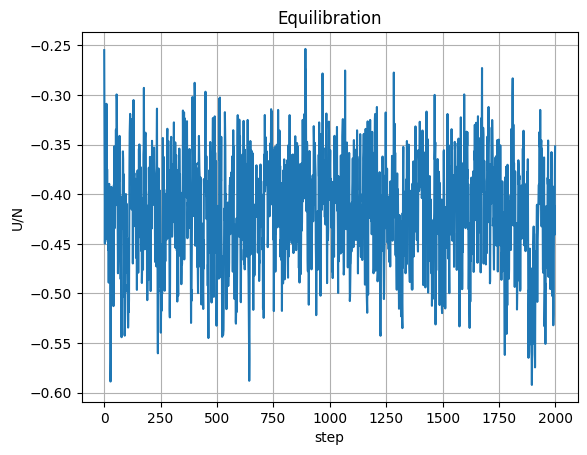

In [1]:
import matplotlib.pyplot as plt

# Leggi i dati dal file
x = []
y = []
with open("equilibrium_out.txt", "r") as file:
    for line in file:
        data = line.split()
        x.append(float(data[0]))
        y.append(float(data[1]))

# Crea il grafico
plt.plot(x, y)
plt.xlabel('step')
plt.ylabel('U/N')
plt.title('Equilibration')
plt.grid(True)
plt.show()

Nel grafico sopra sono riportati i valori istantanei dell'energia potenziale del sistema (acquisiti al fine di verificare l'equilibrazione).

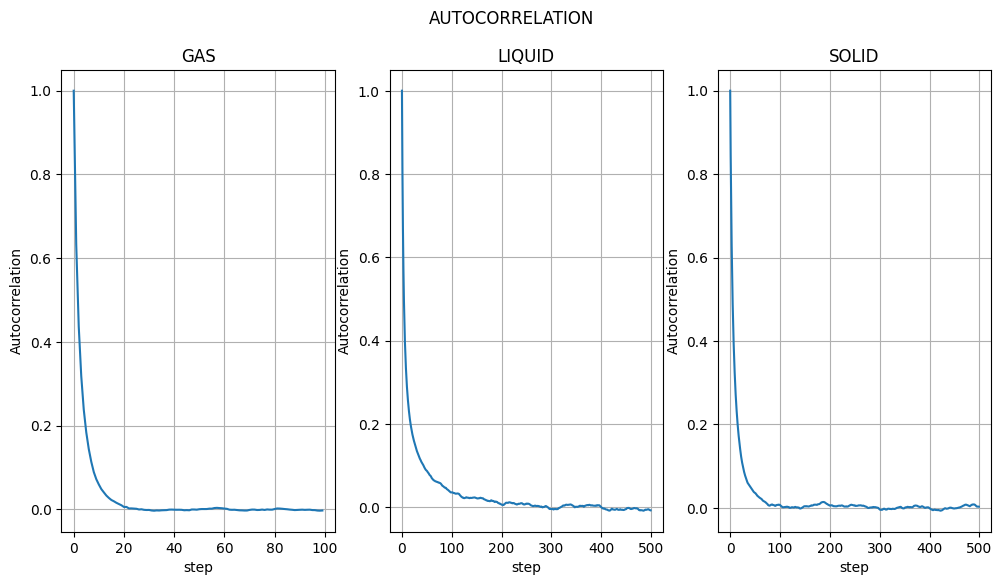

In [2]:
import matplotlib.pyplot as plt
import numpy as np

file_gas = np.genfromtxt('Autocorrelation_gas.txt')
file_liquid = np.genfromtxt('Autocorrelation_liquid.txt')
file_solid = np.genfromtxt('Autocorrelation_solid.txt')

step_gas = file_gas[:100,0]
step_liquid = file_liquid[:500,0]
step_solid = file_solid[:500,0]
data_gas = file_gas[:100,1]
data_liquid = file_liquid[:500,1]
data_solid = file_solid[:500,1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(step_gas, data_gas)
plt.xlabel('step')
plt.ylabel('Autocorrelation')
plt.title('GAS')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(step_liquid, data_liquid)
plt.xlabel('step')
plt.ylabel('Autocorrelation')
plt.title('LIQUID')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(step_solid, data_solid)
plt.xlabel('step')
plt.ylabel('Autocorrelation')
plt.title('SOLID')
plt.grid(True)

plt.suptitle('AUTOCORRELATION')
plt.show()

I grafici di autocorrelazione indicano la correlzione tra 2 stime di una grandezza (in questo caso, l'energia potenziale) prese dopo un certo numero di steps avvenuti tra la rima e la seconda stima.
In questo caso, si verifica che le due stime sono totalmente scorrelate (autocorrelazione pari a 0) dopo:
- circa 20 steps nel caso del gas;
- circa 250 steps nel caso del liquido;
- circa 100 steps nel caso del solido.

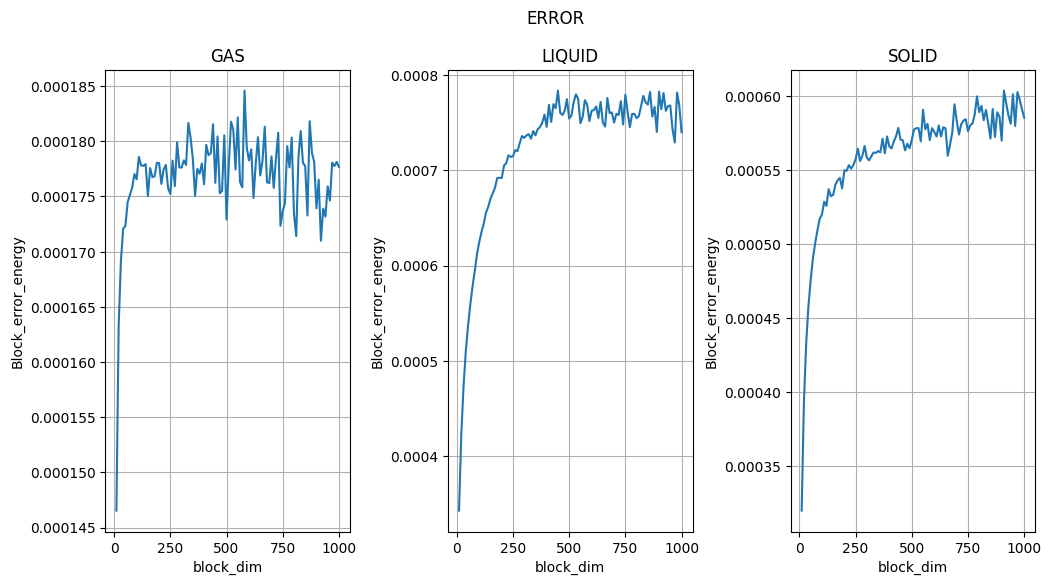

In [3]:
import matplotlib.pyplot as plt
import numpy as np

file_gas = np.genfromtxt('Error_en_block_gas.txt')
file_liquid = np.genfromtxt('Error_en_block_liquid.txt')
file_solid = np.genfromtxt('Error_en_block_solid.txt')

step_gas = file_gas[:100,0]
step_liquid = file_liquid[:100,0]
step_solid = file_solid[:100,0]
data_gas = file_gas[:100,1]
data_liquid = file_liquid[:100,1]
data_solid = file_solid[:100,1]

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(step_gas, data_gas)
plt.xlabel('block_dim')
plt.ylabel('Block_error_energy')
plt.title('GAS')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(step_liquid, data_liquid)
plt.xlabel('block_dim')
plt.ylabel('Block_error_energy')
plt.title('LIQUID')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(step_solid, data_solid)
plt.xlabel('block_dim')
plt.ylabel('Block_error_energy')
plt.title('SOLID')
plt.grid(True)

plt.suptitle('ERROR')
plt.subplots_adjust(wspace=0.4)
plt.show()

Quando la dimensione del blocco è inferiore rispetto alla lunghezza di correlazione l'errore è piccolo. Poi cresce fino a rimanere costante (i.e. oscilla) molto dopo la lunghezza di correlazione.
Per lunghezza di correlazione si intende il numero di step dopo cui l'autocorrelazione si azzera (vedi grafico "AUTOCORRELATION").

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

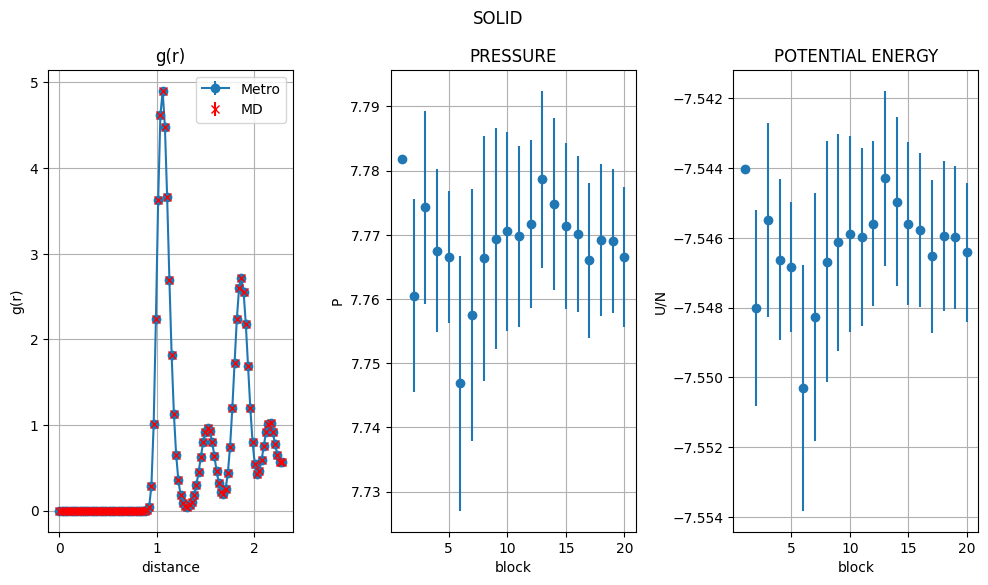

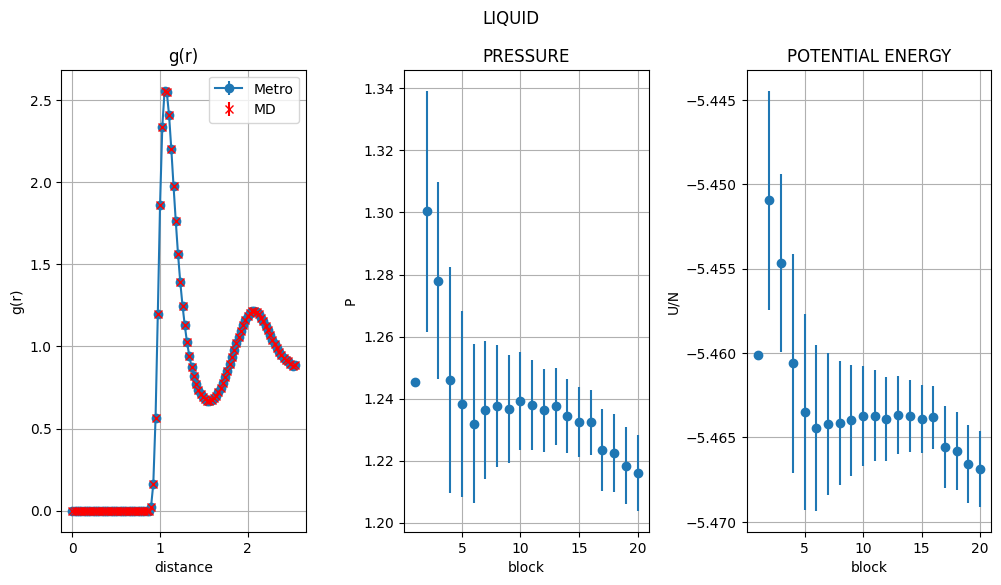

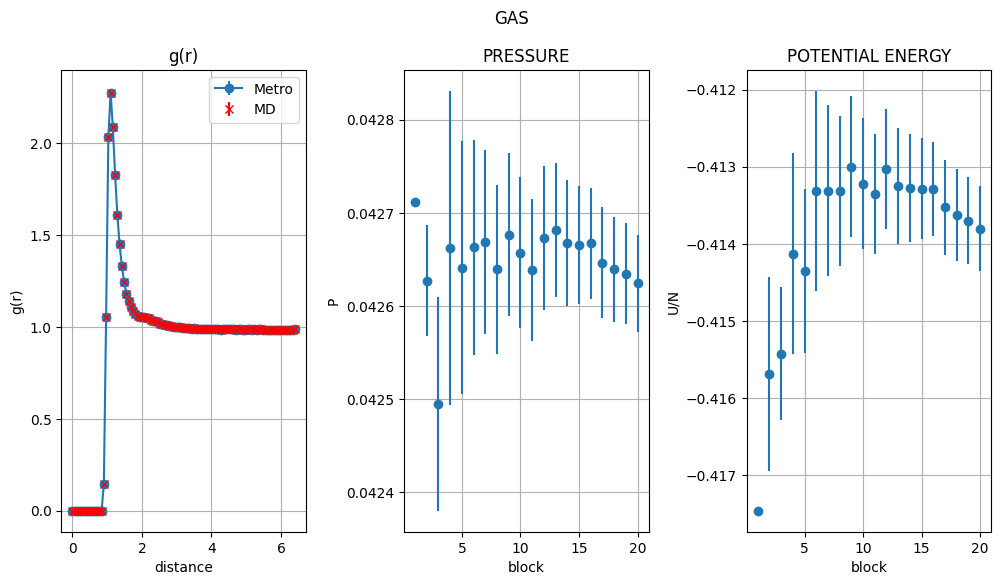

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data_gofr = np.genfromtxt('solid_gofr.dat')
data_gofr_md = np.genfromtxt('solid_gofr_md.dat')
data_pres = np.genfromtxt('solid_pres.dat')
data_pot = np.genfromtxt('solid_pot.dat')

x_gofr = data_gofr[:,0]
y_gofr = data_gofr[:,1]
err_gofr = data_gofr[:,2]
x_gofr_md = data_gofr[:,0]
y_gofr_md = data_gofr[:,1]
err_gofr_md = data_gofr[:,2]
x_pres = data_pres[:,0]
y_pres = data_pres[:,2]
err_pres = data_pres[:,3]
x_pot = data_pot[:,0]
y_pot = data_pot[:,2]
err_pot = data_pot[:,3]
       
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.errorbar(x_gofr, y_gofr, yerr=err_gofr,marker='o',label = 'Metro')
plt.errorbar(x_gofr_md, y_gofr_md, yerr=err_gofr_md,fmt='x',color = 'red',label = 'MD')
plt.xlabel('distance')
plt.ylabel('g(r)')
plt.title('g(r)')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.errorbar(x_pres, y_pres, yerr=err_pres, fmt = 'o')
plt.xlabel('block')
plt.ylabel('P')
plt.title('PRESSURE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.errorbar(x_pot, y_pot, yerr=err_pot, fmt = 'o')
plt.xlabel('block')
plt.ylabel('U/N')
plt.title('POTENTIAL ENERGY')
plt.grid(True)

plt.suptitle('SOLID')
plt.subplots_adjust(wspace=0.4)
plt.show()





data_gofr = np.genfromtxt('liquid_gofr.dat')
data_gofr_md = np.genfromtxt('liquid_gofr_md.dat')
data_pres = np.genfromtxt('liquid_pres.dat')
data_pot = np.genfromtxt('liquid_pot.dat')

x_gofr = data_gofr[:,0]
y_gofr = data_gofr[:,1]
err_gofr = data_gofr[:,2]
x_gofr_md = data_gofr[:,0]
y_gofr_md = data_gofr[:,1]
err_gofr_md = data_gofr[:,2]
x_pres = data_pres[:,0]
y_pres = data_pres[:,2]
err_pres = data_pres[:,3]
x_pot = data_pot[:,0]
y_pot = data_pot[:,2]
err_pot = data_pot[:,3]
       
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.errorbar(x_gofr, y_gofr, yerr=err_gofr,marker='o',label = 'Metro')
plt.errorbar(x_gofr_md, y_gofr_md, yerr=err_gofr_md,fmt='x',color = 'red',label = 'MD')
plt.xlabel('distance')
plt.ylabel('g(r)')
plt.title('g(r)')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.errorbar(x_pres, y_pres, yerr=err_pres, fmt = 'o')
plt.xlabel('block')
plt.ylabel('P')
plt.title('PRESSURE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.errorbar(x_pot, y_pot, yerr=err_pot, fmt = 'o')
plt.xlabel('block')
plt.ylabel('U/N')
plt.title('POTENTIAL ENERGY')
plt.grid(True)

plt.suptitle('LIQUID')
plt.subplots_adjust(wspace=0.4)
plt.show()





data_gofr = np.genfromtxt('gas_gofr.dat')
data_gofr_md = np.genfromtxt('gas_gofr_md.dat')
data_pres = np.genfromtxt('gas_pres.dat')
data_pot = np.genfromtxt('gas_pot.dat')

x_gofr = data_gofr[:,0]
y_gofr = data_gofr[:,1]
err_gofr = data_gofr[:,2]
x_gofr_md = data_gofr[:,0]
y_gofr_md = data_gofr[:,1]
err_gofr_md = data_gofr[:,2]
x_pres = data_pres[:,0]
y_pres = data_pres[:,2]
err_pres = data_pres[:,3]
x_pot = data_pot[:,0]
y_pot = data_pot[:,2]
err_pot = data_pot[:,3]
       
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.errorbar(x_gofr, y_gofr, yerr=err_gofr,marker='o',label = 'Metro')
plt.errorbar(x_gofr_md, y_gofr_md, yerr=err_gofr_md,fmt='x',color = 'red',label = 'MD')
plt.xlabel('distance')
plt.ylabel('g(r)')
plt.title('g(r)')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.errorbar(x_pres, y_pres, yerr=err_pres, fmt = 'o')
plt.xlabel('block')
plt.ylabel('P')
plt.title('PRESSURE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.errorbar(x_pot, y_pot, yerr=err_pot, fmt = 'o')
plt.xlabel('block')
plt.ylabel('U/N')
plt.title('POTENTIAL ENERGY')
plt.grid(True)

plt.suptitle('GAS')
plt.subplots_adjust(wspace=0.4)
plt.show()

COMMENTI:

Il controllo del fatto che l'accettazione del Metropolis fosse di circa 50 % è stato effettuato in tutti i casi (al fine di regolare il parametro DELTA). Tuttavia, nel caso del gas, si è verificato che l'accettazione fosse sempre maggiore del 50 % (dopo una certa soglia, indipendentemente dal valore di DELTA). Ciò si verifica perchè, nel caso del gas, le configurazioni non accettabili sono meno.

Si verifica che la g(r) (radial distribution function) calcolata nei 2 modi (Metropolis, ossia facendo evolvere il sistema proponendo mosse campionando il peso di Boltzmann e NVE, ossia facendo evolvere il sistema integrando le equazioni del moto) è uguale.
Si verifica che, come atteso, la risonanza e le fluttuazioni sono più grandi nel caso del solido (meno importanti nel liquido e meno ancora nel gas): questo si verifica perchè il significato della radial distribution function è quello di indicare la probabilità di avere una data distanza rispetto al caso del gas ideale.

Gli andamenti di pressione ed energia potenziale sono molto simili tra loro: questo perchè la temperatura è perfettamente conservata e, dunque, anche l'energia cinetica; di conseguenza, gli andamenti del viriale e dell'energia potenziale sono tra loro simili (dipendono dagli stessi contributi di coppia r_ij).